In [1]:
from sklearn import tree
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=read_csv("Travel.csv")

In [2]:
df

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [3]:
inputs=df
from sklearn.preprocessing import LabelEncoder

In [4]:
le_EmploymentType=LabelEncoder()
le_GraduateOrNot=LabelEncoder()
le_FrequentFlyer=LabelEncoder()
le_EverTravelledAbroad=LabelEncoder()
le_TravelInsurance=LabelEncoder()

In [5]:
inputs['EmploymentType_n']=le_EmploymentType.fit_transform(inputs['EmploymentType'])
inputs['GraduateOrNot_n']=le_GraduateOrNot.fit_transform(inputs['GraduateOrNot'])
inputs['FrequentFlyer_n']=le_FrequentFlyer.fit_transform(inputs['FrequentFlyer'])
inputs['EverTravelledAbroad_n']=le_EverTravelledAbroad.fit_transform(inputs['EverTravelledAbroad'])
inputs['TravelInsurance_n']=le_TravelInsurance.fit_transform(inputs['TravelInsurance'])
inputs.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n,TravelInsurance_n
0,31,Government Sector,Yes,400000,6,1,No,No,0,0,1,0,0,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,1,1,0,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,1,1,0,0,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,1,1,0,0,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,1,1,1,0,0


In [6]:
inputs_n=inputs.drop(['EmploymentType','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','TravelInsurance'],axis='columns')
inputs_n

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n,TravelInsurance_n
0,31,400000,6,1,0,1,0,0,0
1,31,1250000,7,0,1,1,0,0,0
2,34,500000,4,1,1,1,0,0,1
3,28,700000,3,1,1,1,0,0,0
4,28,700000,8,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1,1
1983,28,1750000,5,1,1,1,0,1,0
1984,28,1150000,6,1,1,1,0,0,0
1985,34,1000000,6,0,1,1,1,1,1


In [7]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2,random_state=0)
kmeans.fit(inputs_n)
kmeans.cluster_centers_

array([[2.97057613e+01, 1.26692387e+06, 4.76851852e+00, 2.75720165e-01,
        8.40534979e-01, 8.90946502e-01, 2.97325103e-01, 3.38477366e-01,
        4.97942387e-01],
       [2.95970443e+01, 6.12758621e+05, 4.73793103e+00, 2.79802956e-01,
        5.91133005e-01, 8.13793103e-01, 1.26108374e-01, 5.02463054e-02,
        2.22660099e-01]])

In [8]:
y=np.array(inputs["TravelInsurance"])
labels=kmeans.labels_
correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels,y.size))

Result: 714 out of 1987 samples were correctly labeled.


In [9]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(inputs_n)
kmeans.cluster_centers_

array([[2.91538462e+01, 1.35000000e+06, 4.78062678e+00, 2.74928775e-01,
        8.78917379e-01, 8.68945869e-01, 3.43304843e-01, 4.48717949e-01,
        5.76923077e-01],
       [2.91686957e+01, 4.74347826e+05, 4.81217391e+00, 2.60869565e-01,
        5.09565217e-01, 7.77391304e-01, 7.47826087e-02, 2.78260870e-02,
        1.96521739e-01],
       [3.05309859e+01, 8.91478873e+05, 4.67746479e+00, 2.94366197e-01,
        7.14084507e-01, 8.94366197e-01, 1.87323944e-01, 6.90140845e-02,
        2.70422535e-01]])

In [11]:
labels=kmeans.labels_
correct_labels=sum(y==labels)
print("Result:%d out of %d samples were correctly labeled." %(correct_labels,y.size))

Result:410 out of 1987 samples were correctly labeled.


In [12]:
labels

array([1, 0, 1, ..., 0, 2, 1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


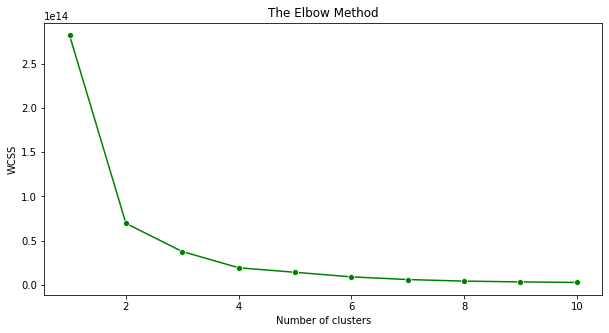

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(inputs_n)
    wcss.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o',color='green')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

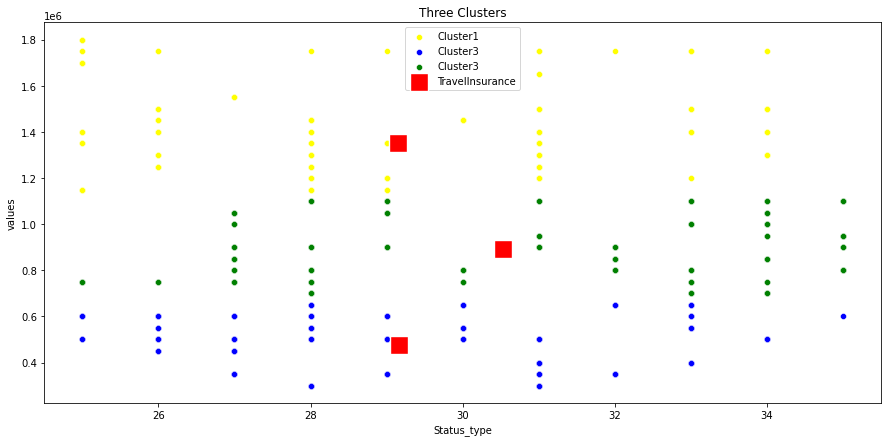

In [14]:
kmeans=KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(inputs_n)
X=np.array(inputs_n)

plt.figure(figsize=(15,7))

sns.scatterplot(X[y_kmeans==0,0],X[y_kmeans==0,1],color='yellow',label='Cluster1')
sns.scatterplot(X[y_kmeans==1,0],X[y_kmeans==1,1],color='blue',label='Cluster3')
sns.scatterplot(X[y_kmeans==2,0],X[y_kmeans==2,1],color='green',label='Cluster3')
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',label='TravelInsurance',s=300,marker=',')

plt.title('Three Clusters')
plt.xlabel('Status_type')
plt.ylabel('values')
plt.legend()
plt.show()

In [15]:
dataset2=inputs_n
dataset2.info

<bound method DataFrame.info of       Age  AnnualIncome  FamilyMembers  ChronicDiseases  EmploymentType_n  \
0      31        400000              6                1                 0   
1      31       1250000              7                0                 1   
2      34        500000              4                1                 1   
3      28        700000              3                1                 1   
4      28        700000              8                1                 1   
...   ...           ...            ...              ...               ...   
1982   33       1500000              4                0                 1   
1983   28       1750000              5                1                 1   
1984   28       1150000              6                1                 1   
1985   34       1000000              6                0                 1   
1986   34        500000              4                0                 1   

      GraduateOrNot_n  FrequentFlyer_n  Eve

Text(0, 0.5, 'FamilyMembers')

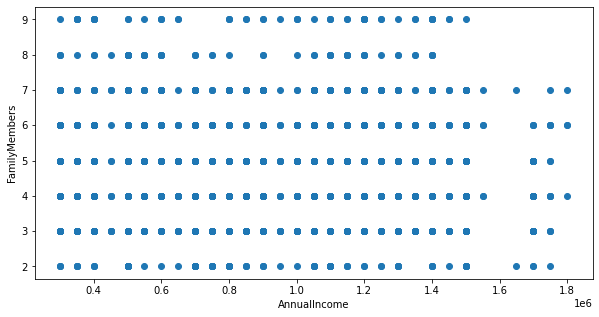

In [16]:
X=dataset2.loc[:,['AnnualIncome','FamilyMembers']]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.scatter(x=X['AnnualIncome'],y=X['FamilyMembers'])
plt.xlabel('AnnualIncome')
plt.ylabel('FamilyMembers')

Text(0, 0.5, 'FamilyMembers')

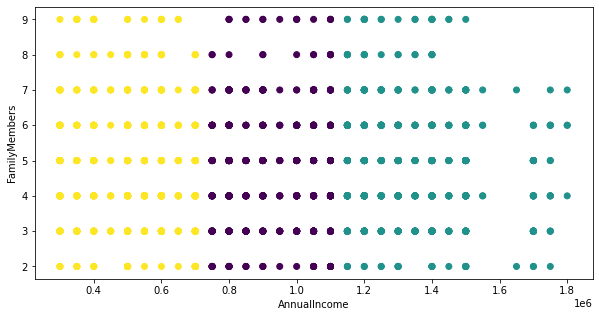

In [17]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(X)
plt.figure(figsize=(10,5))
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=km.labels_)
plt.xlabel('AnnualIncome')
plt.ylabel('FamilyMembers')

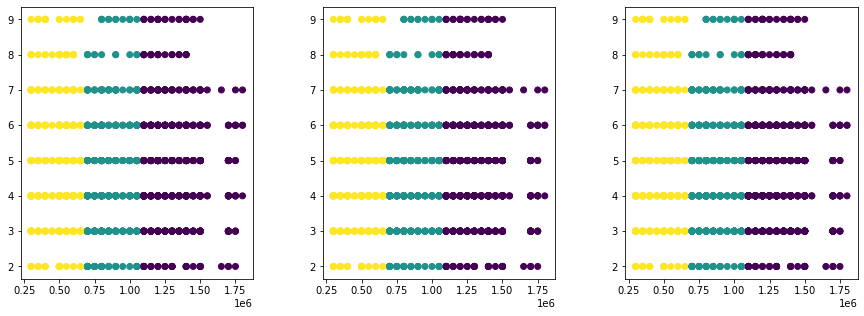

In [18]:
fig, ax =plt.subplots(1,3,gridspec_kw={'wspace':0.3},figsize=(15,5))

for i in range(3):
    km=KMeans(n_clusters=3,init='random',n_init=1,random_state=1)
    km.fit(X)
    ax[i].scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=km.labels_)

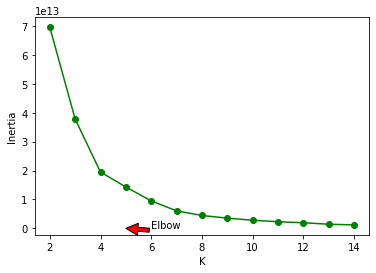

In [19]:
wcss=[]
for i in range(2,15):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(2,15),wcss,'og-')
plt.annotate('Elbow',xy=(5,50000),xytext=(6,100000),arrowprops=dict(facecolor="red"))
plt.xlabel("K")
plt.ylabel("Inertia");